**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb).

# Fundamentals of machine learning

## Improving model fit

Many DL projects will go through the following progression (also listed are ideas that help you make progress if you're stuck at a particular stage):

- You're able to get training started: your training loss goes down over time.
  - If not, try changing gradient descent parameters
- Your model meaningfully generalizes: you can beat a common-sense baseline you set.
  - If not, leverage better architecture priors
- Your model is able to _overfit_, i.e., it can perfectly fit the training data (low training loss) but perhaps at the cost of high validation loss.
  - If not, increase model capacity.

At this point, you have reached a milestone and can start focusing on refining generalization by fighting overfitting.

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

An inappropriately large learning rate( of value 1) can cause training to fail even on a simple problem like MNIST.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# specify optimizer
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 21ms/step - loss: 937.4818 - accuracy: 0.3538 - val_loss: 2.7428 - val_accuracy: 0.2669
Epoch 2/10
375/375 [==============================] - 8s 23ms/step - loss: 6.4485 - accuracy: 0.2619 - val_loss: 3.3719 - val_accuracy: 0.3263
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 3.1369 - accuracy: 0.2428 - val_loss: 4.2731 - val_accuracy: 0.3061
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 3.0325 - accuracy: 0.2409 - val_loss: 2.3725 - val_accuracy: 0.2403
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 2.7394 - accuracy: 0.2488 - val_loss: 2.2066 - val_accuracy: 0.2592
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 2.9397 - accuracy: 0.2665 - val_loss: 2.5474 - val_accuracy: 0.2803
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 2.7768 - accuracy: 0.2843 - val_loss: 2.1396 - val_accuracy: 0.3155


**The same model with a more appropriate learning rate: Exercise (lr=1e-2)**

In [3]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer = keras.optimizers.RMSprop(0.01), 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, 
          epochs = 10, 
          batch_size = 128, 
          validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.3901 - accuracy: 0.9074 - val_loss: 0.1674 - val_accuracy: 0.9528
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1402 - accuracy: 0.9641 - val_loss: 0.1868 - val_accuracy: 0.9594
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1148 - accuracy: 0.9723 - val_loss: 0.1698 - val_accuracy: 0.9662
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0995 - accuracy: 0.9772 - val_loss: 0.2189 - val_accuracy: 0.9618
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0885 - accuracy: 0.9812 - val_loss: 0.2236 - val_accuracy: 0.9690
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0775 - accuracy: 0.9848 - val_loss: 0.2557 - val_accuracy: 0.9683
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0754 - accuracy: 0.9864 - val_loss: 0.2131 - val_accuracy: 0.9751
Epoch 

If training appears to get stuck, you can try the following:

- Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, like in the preceding example, and a learning rate that is too low may make training so slow that it appears to stall.
- Increasing the batch size. A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

### Leveraging better architecture priors

You are able to get training started, but for some reason your validation metrics aren't improving at all. They remain no better than what a random classifier would achieve: your model trains but doesn't generalize. There might be several reasons why this might be happening. Two common ones are:

**Input data simply doesn't contain sufficient information to predict your targets**

- what happened when we tried to fit an MNIST model where the labels were shuffled
- the model would train just fine, but validation accuracy would stay stuck at 10%
- it was plainly impossible to generalize with such a dataset

**The kind of model you're using is not suited for the problem at hand**

- In a timeseries prediction problem, a densely connected architecture may be less appropriate: a _recurrent_ architecture might generalize better
- Using a model that makes the right assumptions about the problem is essential to achieve generalization: you should leverage the right architecture priors
- We willl learn about the best architectures to use for a variety of data modalities—images, text, timeseries, and so on

### Increasing model capacity

**A simple logistic regression on MNIST**

In [4]:
# specify the logistic regression model
model = keras.Sequential(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6705 - accuracy: 0.8337 - val_loss: 0.3592 - val_accuracy: 0.9033
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.9027 - val_loss: 0.3095 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.9122 - val_loss: 0.2895 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2995 - accuracy: 0.9163 - val_loss: 0.2816 - val_accuracy: 0.9212
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.9192 - val_loss: 0.2767 - val_accuracy: 0.9234
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.9208 - val_loss: 0.2741 - val_accuracy: 0.9237
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.9217 - val_loss: 0.2702 - val_accuracy: 0.9258
Epoch 

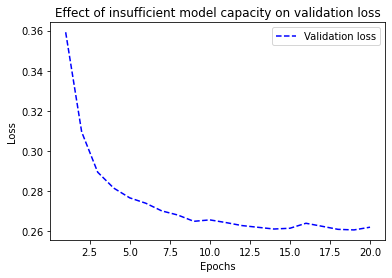

In [6]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- Validation metrics seem to stall, or to improve very slowly, instead of peaking and reversing course.
- You can fit, but you can’t clearly overfit, even after many iterations over the training data.

**It should always be possible to overfit**

- If you can’t seem to be able to overfit, it’s likely a problem with the representational power of your model
- You’re going to need a bigger model, one with more capacity, that is to say, one able to store more information
- You can increase representational power by
  - adding more layers
  - using bigger layers (layers with more parameters)
  - using kinds of layers that are more appropriate for the problem at hand (better architecture priors).

Let’s try training a bigger model, one with two intermediate layers with 96 units each:

### Exercise: Build a larger model

In [7]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'), 
    layers.Dense(96, activation='relu'), 
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3607 - accuracy: 0.8977 - val_loss: 0.1792 - val_accuracy: 0.9478
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1573 - accuracy: 0.9529 - val_loss: 0.1358 - val_accuracy: 0.9622
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1104 - accuracy: 0.9664 - val_loss: 0.1139 - val_accuracy: 0.9682
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0833 - accuracy: 0.9746 - val_loss: 0.0988 - val_accuracy: 0.9717
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.0946 - val_accuracy: 0.9729
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.1040 - val_accuracy: 0.9708
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.0958 - val_accuracy: 0.9753
Epoch 

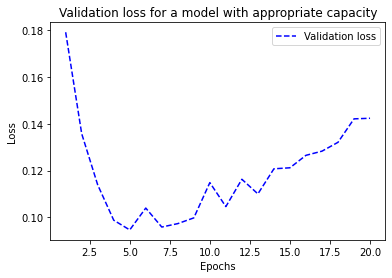

In [8]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization: An IMDB example

### Regularizing your model

Regularization: actively impeding the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation.

- regularizing a model is a process that should always be guided by an accurate evaluation procedure
- you will only achieve generalization if you can measure it!

Let’s review some of the most common regularization techniques in the context of IMDB movie reviews problem


#### Reducing the network's size

- a model that is too small will not overfit
- simplest way to mitigate overfitting is to reduce the size of the model
- number of learnable parameters in the model is determined by the number of layers and the number of units per layer
- however, you should use models that have enough parameters that they don’t underfit!
- compromise is to be found between too much capacity and not enough capacity
- no magical formula to determine the right number of layers or the right size for each layer
- evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the correct model size for your data
- general workflow for finding an appropriate model size:
  - start with relatively few layers and parameters
  - increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss

**Original model**

In [9]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)


17464789/17464789 [==============================] - 0s 0us/step


In [10]:
train_data, train_labels

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]), array([1, 0, 0, ..., 0, 1, 0]))

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.5124 - accuracy: 0.7817 - val_loss: 0.3880 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3062 - accuracy: 0.9049 - val_loss: 0.3003 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2269 - accuracy: 0.9279 - val_loss: 0.2807 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1796 - accuracy: 0.9427 - val_loss: 0.2783 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1473 - accuracy: 0.9529 - val_loss: 0.2866 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1221 - accuracy: 0.9628 - val_loss: 0.2948 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0999 - accuracy: 0.9710 - val_loss: 0.3319 - val_accuracy: 0.8791
Epoch 8/20
30

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation='relu'), 
    layers.Dense(4, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy'])

history_smaller_model = model.fit(train_data, train_labels, epochs = 20, 
          batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5454 - accuracy: 0.7751 - val_loss: 0.4384 - val_accuracy: 0.8605
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3688 - accuracy: 0.8939 - val_loss: 0.3585 - val_accuracy: 0.8688
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2851 - accuracy: 0.9138 - val_loss: 0.3108 - val_accuracy: 0.8865
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2333 - accuracy: 0.9293 - val_loss: 0.2925 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1951 - accuracy: 0.9415 - val_loss: 0.2772 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1673 - accuracy: 0.9489 - val_loss: 0.2796 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1462 - accuracy: 0.9581 - val_loss: 0.2772 - val_accuracy: 0.8885
Epoch 8/20
30

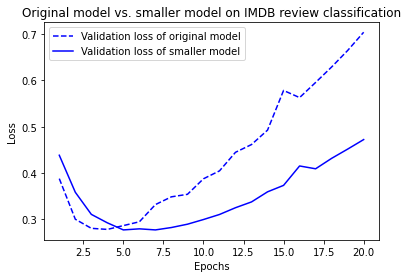

In [13]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b-",
         label="Validation loss of smaller model")
plt.title("Original model vs. smaller model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- the smaller model starts overfitting later than the reference model
- its performance degrades more slowly once it starts overfitting

**Version of the model with higher capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'), 
    layers.Dense(512, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['accuracy'])

history_larger_model = model.fit(train_data, train_labels, epochs = 20, 
          batch_size = 512, validation_split = 0.4)

Epoch 1/20
30/30 [==============================] - 9s 273ms/step - loss: 0.5529 - accuracy: 0.7501 - val_loss: 0.3218 - val_accuracy: 0.8852
Epoch 2/20
30/30 [==============================] - 8s 263ms/step - loss: 0.2307 - accuracy: 0.9115 - val_loss: 0.4539 - val_accuracy: 0.8124
Epoch 3/20
30/30 [==============================] - 8s 263ms/step - loss: 0.1609 - accuracy: 0.9384 - val_loss: 0.3015 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 8s 262ms/step - loss: 0.1008 - accuracy: 0.9693 - val_loss: 0.3533 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 8s 262ms/step - loss: 0.0746 - accuracy: 0.9801 - val_loss: 0.3020 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 8s 264ms/step - loss: 0.0089 - accuracy: 0.9993 - val_loss: 0.5332 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 8s 263ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.6495 - val_accuracy: 0.8838
Epoch 

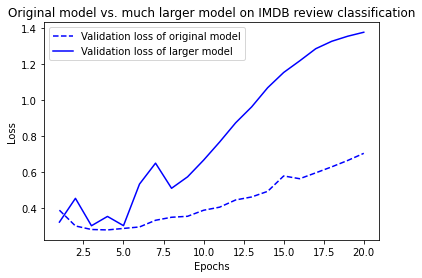

In [15]:
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b-",
         label="Validation loss of larger model")
plt.title("Original model vs. much larger model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- bigger model starts overfitting almost immediately
- it overfits much more severely
- its validation loss is also noisier
- it gets training loss near zero very quickly
- a very high capacity model will
  - fit the the training data quickly (resulting in a low training loss)
  - but will be more susceptible it is to overfitting (resulting in a large difference between the training and validation loss)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

Regularization can be applied to:
- weights using `kernel_regularizer`
- biases using `bias_regularizer`
- output of the layer using `activity_regularizer`

We will use weight regularization below.

In [16]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

l2 = regularized loss = regular cross entropy loss + coefficent * \sum_i,j w_ij^2

l1 = absolute value of weights

In [17]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.02), activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.6914 - accuracy: 0.7703 - val_loss: 0.5085 - val_accuracy: 0.8444
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4615 - accuracy: 0.8705 - val_loss: 0.4790 - val_accuracy: 0.8371
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4227 - accuracy: 0.8787 - val_loss: 0.4734 - val_accuracy: 0.8342
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4083 - accuracy: 0.8813 - val_loss: 0.4124 - val_accuracy: 0.8749
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3958 - accuracy: 0.8832 - val_loss: 0.4172 - val_accuracy: 0.8674
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3843 - accuracy: 0.8879 - val_loss: 0.4151 - val_accuracy: 0.8650
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3893 - accuracy: 0.8827 - val_loss: 0.4208 - val_accuracy: 0.8628
Epoch 8/20
30

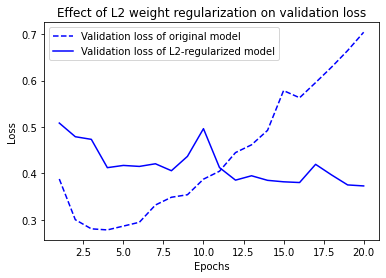

In [18]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, "b-",
         label="Validation loss of L2-regularized model")
plt.title("Effect of L2 weight regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- model with L2 regularization has become much more resistant to overfitting than the reference model
- both models have the same number of parameters

**Total loss when using weight regularization includes prediction losses as well as layer losses**

- "loss" as a metric changes meaning when you have weight regularization
- without regularization, loss is simply the average of the prediction loss function over the dataset
- with weight regularization, loss includes *both* prediction losses as well as regularization losses for regularized layers

**Different weight regularizers available in Keras**

In [ ]:
regularizers.l2(0.02)
regularizers.l1(0.01)
regularizers.l1_l2(l1=0.01, l2=0.02)

- weight regularization is more typically used for smaller deep learning models
- large deep learning models tend to be so overparameterized that imposing constraints on weight values hasn’t much impact on model capacity and generalization
- in these cases, a different regularization technique is preferred: **dropout**

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Denese16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Droptout(0.5),
    layers.Dense(1, activation='sigmoid')
])

Epoch 1/20
30/30 [==============================] - 2s 73ms/step - loss: 0.3280 - accuracy: 0.9048 - val_loss: 0.6509 - val_accuracy: 0.7616
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3385 - accuracy: 0.8987 - val_loss: 0.4014 - val_accuracy: 0.8677
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3456 - accuracy: 0.8954 - val_loss: 0.3752 - val_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.3317 - accuracy: 0.9037 - val_loss: 0.3720 - val_accuracy: 0.8827
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3278 - accuracy: 0.9051 - val_loss: 0.3706 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.3297 - accuracy: 0.9029 - val_loss: 0.4254 - val_accuracy: 0.8554
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3260 - accuracy: 0.9049 - val_loss: 0.4106 - val_accuracy: 0.8632
Epoch 8/20
30

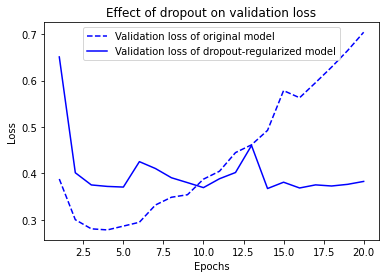

In [19]:
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b-",
         label="Validation loss of dropout-regularized model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


- dropout achieves clear improvement over the reference model
- it also seems to be working much better than L2 regularization (lowest validation loss reached has improved)

**How does dropout work?**

- dropout, **applied to a layer**, consists of randomly dropping out (setting to zero) a number of output features of the layer **during training**
- after applying dropout, the layer output will have a few zero entries distributed at random
- the dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5.

In [20]:

batch_size = 4
feature_dim = 5
layer_output = tf.random.uniform((batch_size, feature_dim)) # in reality, layer_output will not be random
layer_output.numpy()

# dropout probability
dropout = 0.2

# random boolean array where True occurs with prob 1-dropout
mask = tf.random.uniform(shape=layer_output.shape) < 1-dropout

# convert True/False to 1/0

mask = tf.cast(mask, tf.float32)

# put on the mask

layer_output_dropout = layer_output * mask

# roughly half of the entries will have been zeroed out
layer_output_dropout /= 1-dropout

# keep the random layer output unbiased!


**Simulation to check for unbiased property**

Suppose we have a weight $w$ and we zero it out with probability $p$ as follows:

$$
w_D = w \cdot 1[U < 1-p]
$$

where random variable $U$ distributed as Uniform$(0,1)$. Can you verify the following unbiasedness property?

$$
E\left[ \frac{w_D}{1-p} \right] = w
$$

Note that $w_D$ is either $w$ (with prob $1-p$) or $0$ (with prob $p$) and therefore

$$
E\left[ w_D \right] = w \cdot (1-p) + 0 \cdot p = w(1-p)
$$

In [21]:

num_iters = 1000
sum = tf.zeros_like(layer_output)
for i in range(num_iters):
  mask = tf.random.uniform(shape=layer_output.shape) < 1 - dropout
  mask = tf.cast(mask, tf.float32)
  layer_output_dropout = layer_output * mask
  layer_output_dropout /= 1 - dropout
  sum += layer_output_dropout
average = sum/num_iters
print("original layer output:\n", layer_output.numpy())  # original layer output
print(f"average over {num_iters} applications of dropout:\n", average.numpy()) # the average of zeroed out layer outputs will be close to the original output

original layer output:
 [[0.21388793 0.6737547  0.4377061  0.41348708 0.14098966]
 [0.09045982 0.8052676  0.2332381  0.45101655 0.33014524]
 [0.89679086 0.01144171 0.46760464 0.02508891 0.40856957]
 [0.14005089 0.84498036 0.7334926  0.7430736  0.34887588]]
average over 1000 applications of dropout:
 [[0.21388881 0.6905922  0.44153216 0.41710168 0.14169511]
 [0.09068631 0.81332517 0.22944896 0.44932842 0.32312855]
 [0.8990298  0.0115276  0.47052538 0.02502615 0.4177622 ]
 [0.13865073 0.85659254 0.73441213 0.73378134 0.35192952]]


**The paper that introduced dropout**

If you're interested in learning more about dropout including the motivation behind it and connections to deterministic forms of regularization, see the paper:

Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014).  
Dropout: a simple way to prevent neural networks from overfitting.  
The Journal of Machine Learning Research, 15(1), 1929-1958.  
https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf